# User guide

In [ ]:
from datetime import datetime

import agrometeo as agm

The core object of agrometeo-geopy is the `AgrometeoDataset`, which can be instantiated providing a Nominatim query (of a Swiss region) as the `region` argument as in:

In [ ]:
agm_ds = agm.AgrometeoDataset(region="Canton de Genève")

Alternatively, the `region` argument may also be provided as:

* A list-like with the west, south, east and north bounds
* A geopandas geo-series or geo-data frame
* A geometric object, e.g., shapely geometry
* A filename or URL, a file-like object opened in binary ('rb') mode, or a Path object that will be passed to `geopandas.read_file`.

Once instantiated, the `stations_gdf` property features the stations within the region, with its locations and other attributes:

In [ ]:
agm_ds.stations_gdf.head()

,id,name,lat_ch,long_ch,altitude,interval,phone,email,into_service_at,preview_until,...,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
29,44,DARDAGNY,487462.0,116662.0,488,10,079 332 38 36,domaine.les.hutins@bluewin.ch,2005-11-01,2023-04-13T16:00:00.000000Z,...,5.955911,308046120,relation,1702419,46.225651,6.143921,"Geneva, Switzerland",boundary,administrative,0.550757
30,45,LA-PLAINE,489447.0,115605.0,360,10,079 332 32 73,gegedudu@bluewin.ch,2005-11-02,2023-04-13T16:00:00.000000Z,...,5.955911,308046120,relation,1702419,46.225651,6.143921,"Geneva, Switzerland",boundary,administrative,0.550757
31,46,SATIGNY,491847.0,119767.0,442,10,079 332 36 56,info@champvigny.ch,2005-11-01,2023-04-13T16:00:00.000000Z,...,5.955911,308046120,relation,1702419,46.225651,6.143921,"Geneva, Switzerland",boundary,administrative,0.550757
32,47,PEISSY,489978.0,118092.0,450,10,079 332 32 81,lesvallieres@bluewin.ch,2005-11-03,2023-04-13T16:00:00.000000Z,...,5.955911,308046120,relation,1702419,46.225651,6.143921,"Geneva, Switzerland",boundary,administrative,0.550757
33,48,ANIERES,506285.0,125138.0,412,10,079 332 38 89,vinsvillard@bluewin.ch,2005-11-03,2023-04-13T16:00:00.000000Z,...,5.955911,308046120,relation,1702419,46.225651,6.143921,"Geneva, Switzerland",boundary,administrative,0.550757


Similarly, the `variables_df` property features the available variables and its metadata:

In [ ]:
agm_ds.variables_df.head()

,id,color,default_agg,series_style,decimals,order,aggregations,created_at,updated_at,name.de,name.en,name.fr,name.it,unit.de,unit.en,unit.fr,unit.it,actions.update,actions.delete
0,42,#167687,sum,Bar,NaN,0,[],2021-03-09T00:00:56.000000Z,2021-03-09T00:00:56.000000Z,Blattnässe III,Leaf moisture III,Humectage du feuillage III,Bagnatura fogliare III,?,?,?,?,False,False
1,43,None,avg,Line,NaN,0,[],2021-09-11T00:02:00.000000Z,2021-09-11T00:02:00.000000Z,Spannung interne Lithiumbatterie,Voltage of internal lithium battery,Voltage batterie interne,NaN,Volt,Volt,Volt,NaN,False,False
2,1,#AA0000,avg,Line,1.0,1,"[{'agg': 'avg', 'label': {'de': 'Temperatur Du...",2020-12-14T13:17:02.000000Z,2021-12-07T00:02:25.000000Z,Temperatur +2m,Temperature 2m above ground,Température à +2m,Temperatura a 2m dal suolo,°C,°C,°C,°C,False,False
3,4,#606CB2,avg,Area,NaN,2,"[{'agg': 'avg', 'label': {'de': 'Rel. Luftfeuc...",2020-12-14T13:17:02.000000Z,2021-10-26T00:02:11.000000Z,relative Luftfeuchtigkeit,Relative humidity,Humidité relative,Umiditá relativa,%,%,%,%,False,False
4,6,#000080,sum,Bar,1.0,3,"[{'agg': 'sum', 'label': {'de': 'Niederschlag ...",2020-12-14T13:17:04.000000Z,2021-12-07T00:02:24.000000Z,Niederschläge,Precipitation,Précipitations,Precipitazioni,mm oder Liter/m2,mm ou litres/m2,mm ou litres/m2,mm ou litres/m2,False,False


Given a variable and a time range, the time seres data frame of measurements in the corresponding stations can be obtained with the `get_ts_df` method as in:

In [ ]:
variable = "temperature"
start_date = "2021-08-13"
end_date = "2021-08-16"

ts_df = agm_ds.get_ts_df(variable, start_date, end_date)
ts_df

name,DARDAGNY,LA-PLAINE,SATIGNY,PEISSY,ANIERES,LULLY,LULLIER,BERNEX,TROINEX,MEINIER
time,,,,,,,,,,
2021-08-13 00:00:00,19.3,17.8,18.5,17.9,20.6,18.4,20.3,18.6,19.4,25.8
2021-08-13 00:10:00,19.6,17.9,18.4,17.7,20.0,18.3,19.6,18.7,19.1,28.6
2021-08-13 00:20:00,19.0,17.7,18.2,17.6,19.4,18.4,19.1,18.7,19.2,24.1
2021-08-13 00:30:00,18.3,18.0,18.1,17.4,19.1,18.3,19.1,18.6,18.9,22.5
2021-08-13 00:40:00,18.7,18.0,18.1,17.6,19.1,18.0,19.0,18.7,18.5,21.5
...,...,...,...,...,...,...,...,...,...,...
2021-08-16 23:10:00,17.5,17.8,17.3,16.9,17.9,17.6,17.3,17.2,17.9,22.2
2021-08-16 23:20:00,17.4,17.9,17.4,17.1,17.9,17.6,17.3,17.2,18.0,22.0
2021-08-16 23:30:00,17.2,17.9,17.5,17.3,17.8,17.6,17.3,17.3,18.0,21.7


The `variable` argument can be either:
- an agrometeo variable code (integer or string) - see the `variables_df` property above
- an essential climate variable (ECV) following the meteostations-geopy nomenclature (string)
- an agrometeo variable name (string) - see the `variables_df` property above

The returned object is a pandas data frame upon which we can operate using any of its supported functions, e.g.:

<Axes: xlabel='time'>

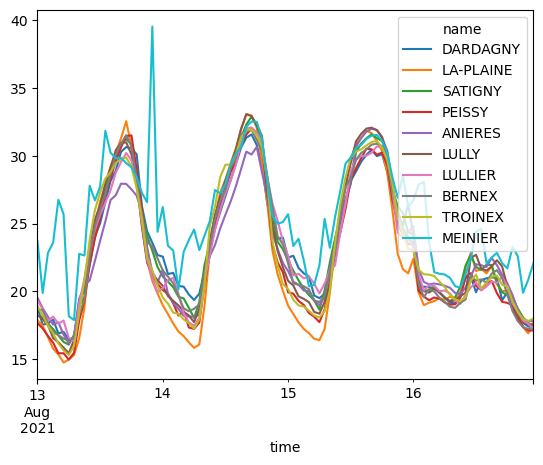

In [ ]:
ts_df.resample("H").mean().plot()

We can also use the `get_ts_gdf` method to include the locations of the stations along with the time series of measurements as in:

In [ ]:
ts_gdf = agm_ds.get_ts_gdf(variable, start_date, end_date)
ts_gdf

time,2021-08-13 00:00:00,2021-08-13 00:10:00,2021-08-13 00:20:00,2021-08-13 00:30:00,2021-08-13 00:40:00,2021-08-13 00:50:00,2021-08-13 01:00:00,2021-08-13 01:10:00,2021-08-13 01:20:00,2021-08-13 01:30:00,...,2021-08-16 22:30:00,2021-08-16 22:40:00,2021-08-16 22:50:00,2021-08-16 23:00:00,2021-08-16 23:10:00,2021-08-16 23:20:00,2021-08-16 23:30:00,2021-08-16 23:40:00,2021-08-16 23:50:00,geometry
name,,,,,,,,,,,,,,,,,,,,,
DARDAGNY,19.3,19.6,19.0,18.3,18.7,18.2,17.9,17.6,17.5,17.4,...,17.5,17.3,17.4,17.5,17.5,17.4,17.2,17.2,17.1,POINT (5.98084 46.19201)
LA-PLAINE,17.8,17.9,17.7,18.0,18.0,17.9,17.9,17.7,17.6,17.2,...,16.9,16.9,16.8,17.4,17.8,17.9,17.9,17.9,17.8,POINT (6.00680 46.18283)
SATIGNY,18.5,18.4,18.2,18.1,18.1,17.9,17.9,17.9,18.0,18.7,...,17.6,17.5,17.6,17.6,17.3,17.4,17.5,17.7,17.5,POINT (6.03691 46.22066)
PEISSY,17.9,17.7,17.6,17.4,17.6,17.7,17.6,17.5,17.2,17.0,...,17.1,17.2,17.3,17.1,16.9,17.1,17.3,17.1,17.1,POINT (6.01309 46.20529)
ANIERES,20.6,20.0,19.4,19.1,19.1,19.0,18.9,18.9,18.9,18.8,...,17.7,17.7,17.9,17.9,17.9,17.9,17.8,17.7,17.7,POINT (6.22292 46.27113)
LULLY,18.4,18.3,18.4,18.3,18.0,18.2,18.2,18.0,17.8,17.7,...,17.5,17.5,17.6,17.6,17.6,17.6,17.6,17.4,17.3,POINT (6.07679 46.16735)
LULLIER,20.3,19.6,19.1,19.1,19.0,18.9,19.1,19.2,18.9,18.7,...,17.5,17.6,17.5,17.3,17.3,17.3,17.3,17.2,17.1,POINT (6.25441 46.22210)
BERNEX,18.6,18.7,18.7,18.6,18.7,18.7,18.8,19.1,18.8,18.5,...,17.4,17.3,17.2,17.2,17.2,17.2,17.3,17.1,17.1,POINT (6.06481 46.16965)
TROINEX,19.4,19.1,19.2,18.9,18.5,18.4,18.4,18.6,18.4,18.1,...,17.9,17.6,17.6,17.8,17.9,18.0,18.0,18.1,18.1,POINT (6.15076 46.15991)


We can then use the `plot_temperature_map` method to plot a map of the temperature measurements at a given point in time provided as the `dt` argument:

<Axes: title={'center': '2021-08-15 21:00:00'}>

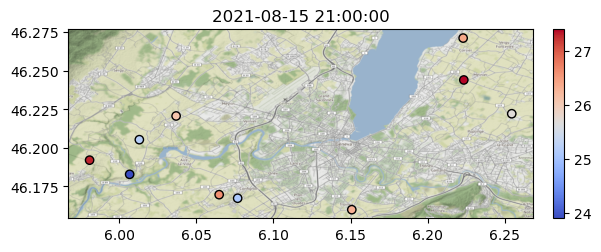

In [ ]:
agm.plot_temperature_map(
    ts_gdf,
    dt=datetime(year=2021, month=8, day=15, hour=21),
    plot_kws=dict(edgecolors="black"),
)